## 1. Imports

In [2]:
import numpy as np
import pandas as pd
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor

## 2. Loading the dataset into a dataframe

In [4]:
df=pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


In [5]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,USA,chevy s-10


## 3. Exploratory data analysis and Data Preparation

### a. Removing dupicates and rows with missing values.

In [8]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

### b. Printing a small slice (head) of data to get a look on data

In [10]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


### c. Using the .describe() function to get a statistical analysis of the numerical columns, as well as using the dtypes function to get an idea of data type of each column.

In [12]:
print("Data types of columns in the dataset :\n", df.dtypes)
df.describe()

Data types of columns in the dataset :
 mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object


,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


###  d. Removing the car name feature, as we have to generalize the behaviour of a car on basis of its features, rather than the model focussing on a particualr brand/make of car

In [14]:
df.drop(columns=['car name'],inplace=True)

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA


### e. Printing the unique values of each column in the dataset, to help understand what data and its values exist in the dataset

In [17]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'mpg': [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
Unique values in column 'cylinders': [8 4 6 3 5]
Unique values in column 'displacement': [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   9

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA


### f. One-Hot encoding the 'origin' column to help convert them into features that can be used for prediction

In [20]:
# Check unique values in the 'origin' column
print(df['origin'].unique())

# Perform one-hot encoding based on string values
df['USA'] = (df['origin'] == 'USA').astype(float)
df['Europe'] = (df['origin'] == 'Europe').astype(float)
df['Japan'] = (df['origin'] == 'Japan').astype(float)

# Drop the 'origin' column
df = df.drop(columns=['origin'])

# Check the result
df.tail()

['USA' 'Japan' 'Europe']


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
393,27.0,4,140.0,86,2790,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52,2130,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84,2295,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79,2625,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82,2720,19.4,82,1.0,0.0,0.0


In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8,307.0,130,3504,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165,3693,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150,3436,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150,3433,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140,3449,10.5,70,1.0,0.0,0.0


### g. We can observe in the data type desctiption of the horsepower that the literals should in _int64_ or _float64_ dtype, but it is of type _object_. Additionally, it also has a garbage value of "?" present for some rows, which may have been done in the dataset for denoting missing horsepower values

In [23]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

In [24]:
df['horsepower'] = df['horsepower'].astype(float)

In [25]:
mean_horsepower = df['horsepower'].mean()
df['horsepower'].fillna(mean_horsepower, inplace=True)

C:\Users\benhu\AppData\Local\Temp\ipykernel_27676\1796777968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(mean_horsepower, inplace=True)


In [26]:
df['horsepower'] = df['horsepower'].astype(int)

In [27]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
USA             float64
Europe          float64
Japan           float64
dtype: object

## 4. Exploring the influence of the all the numerical features on the target variable _mpg_ and Data preprocessing

### a. Defining all the numerical features

In [30]:
numerical_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year','USA','Europe','Japan']

### b. Scatterplots of _numerical_features_ against _mpg_

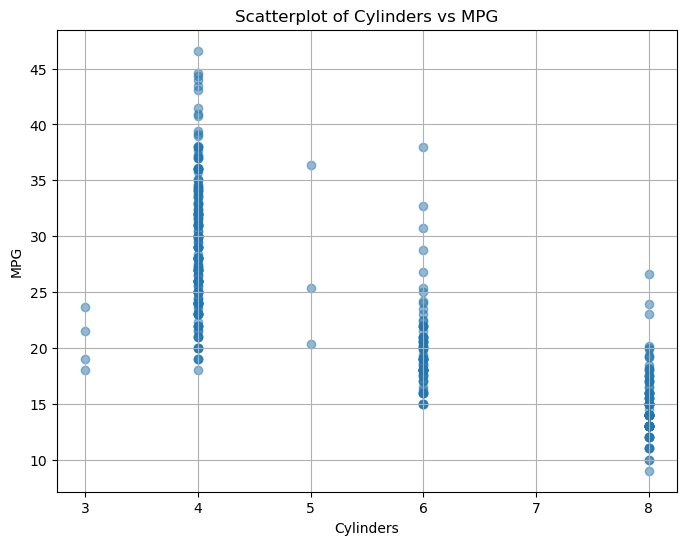

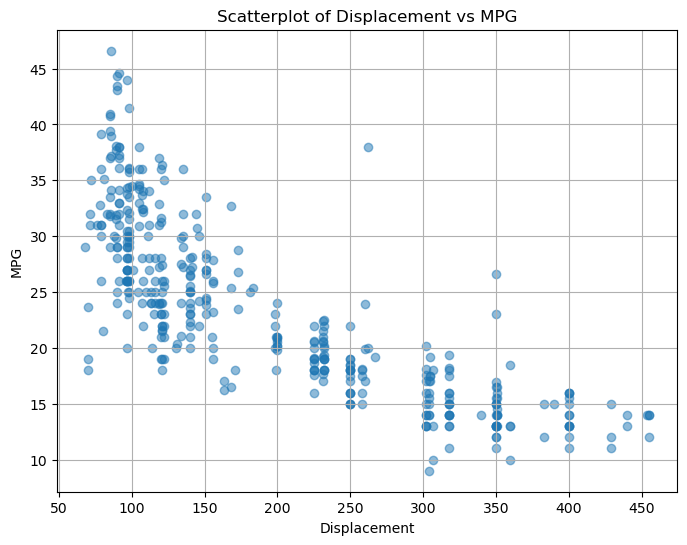

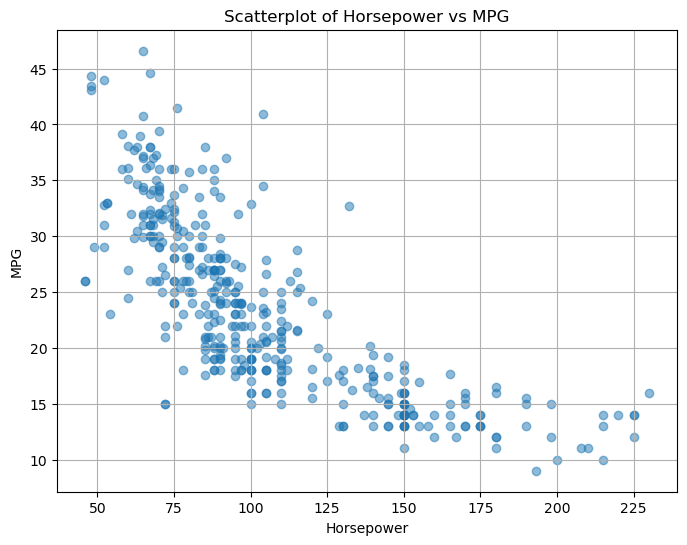

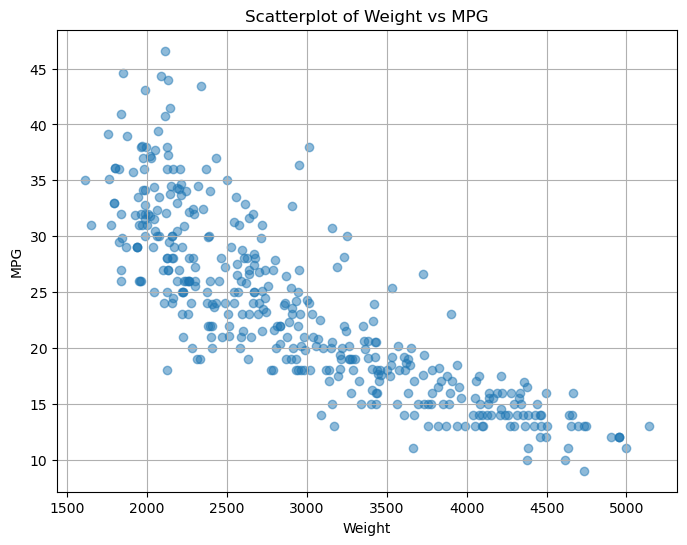

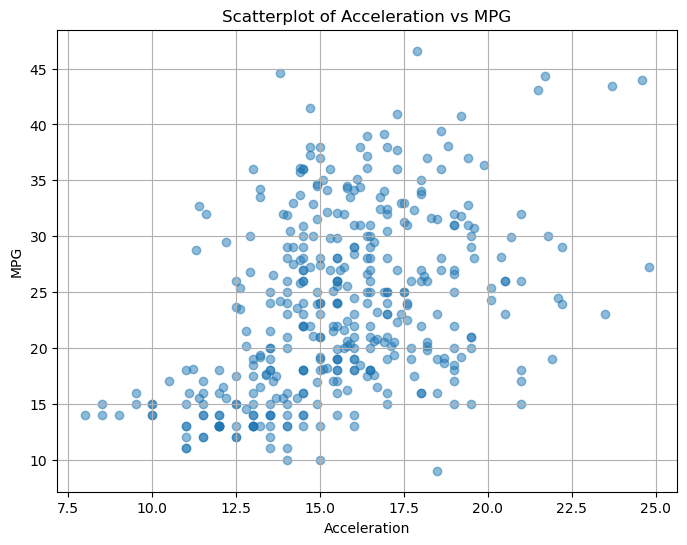

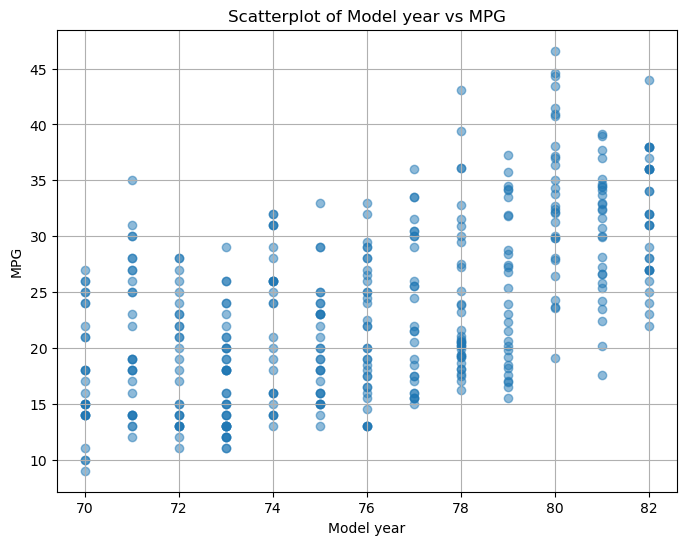

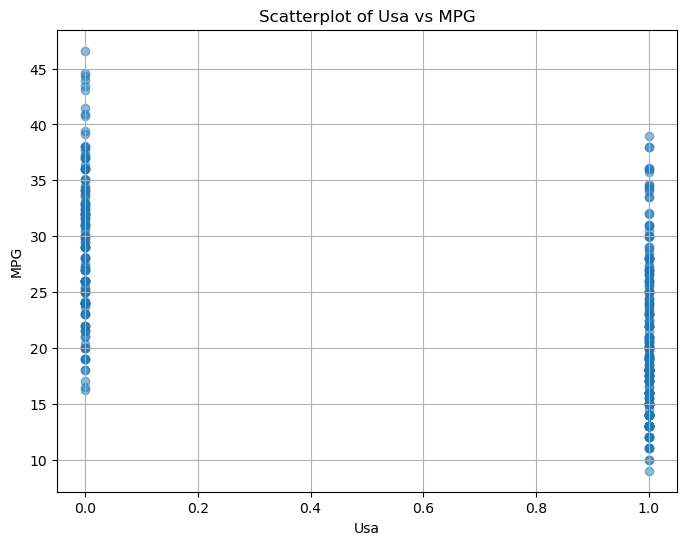

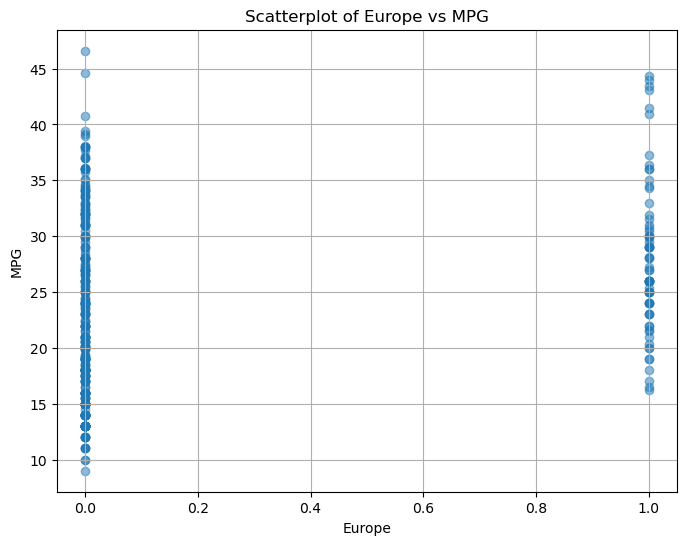

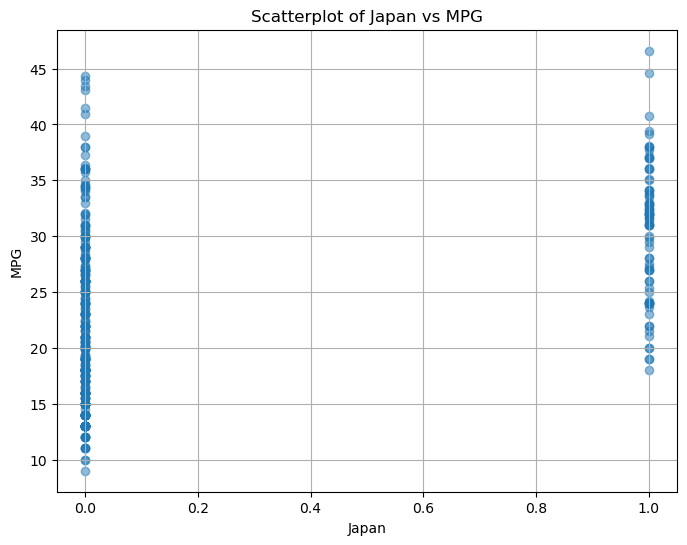

In [32]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['mpg'], alpha=0.5)
    plt.title(f'Scatterplot of {feature.capitalize()} vs MPG')
    plt.xlabel(feature.capitalize())
    plt.ylabel('MPG')
    plt.grid(True)
    plt.show()

### c. Correlation Matrix

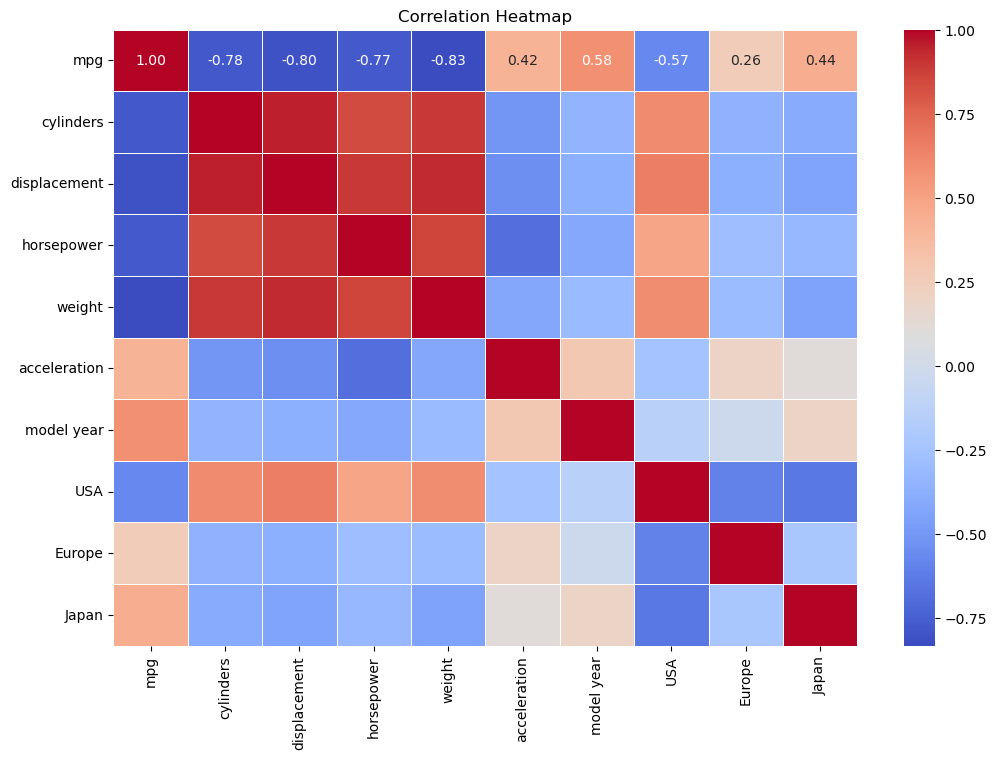

In [34]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### d. Pairplot for visualizing relationships between numerical features and target variable 

C:\DS4Windows\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\DS4Windows\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\DS4Windows\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\DS4Windows\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

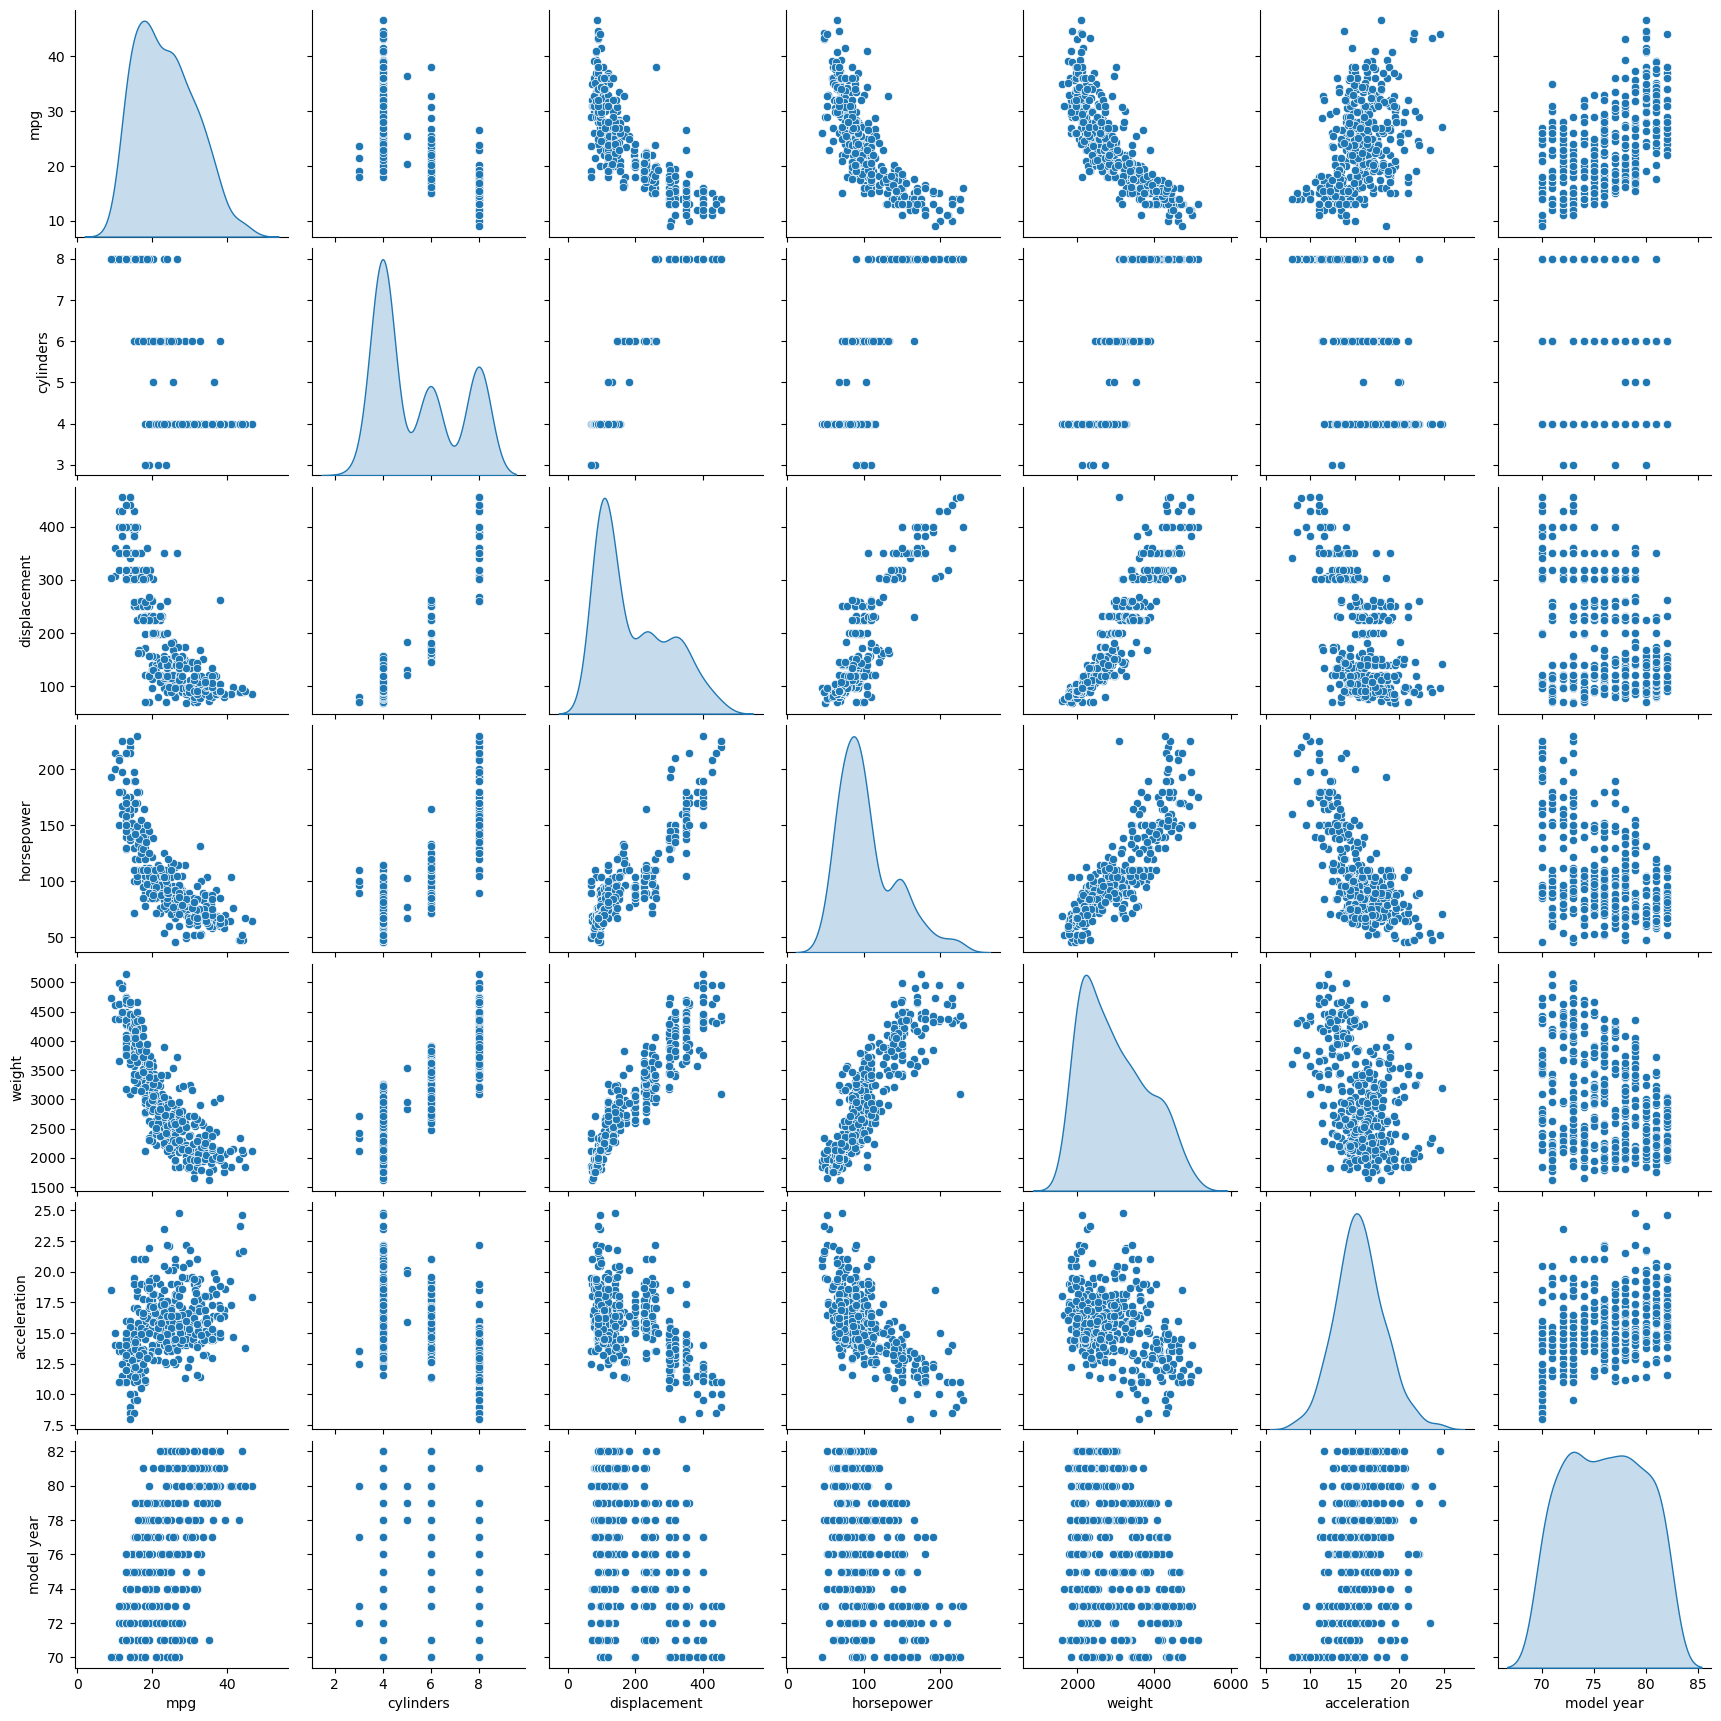

In [36]:
sns.pairplot(df, vars=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'], diag_kind='kde')
plt.show()

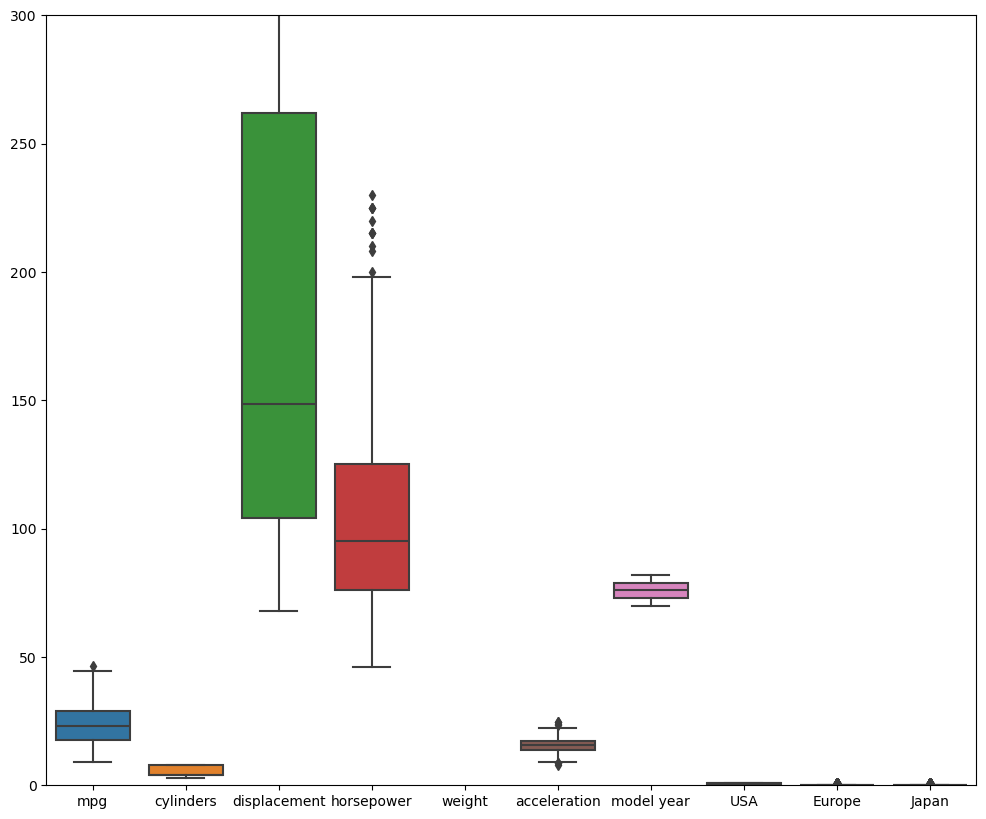

In [37]:
# Boxplot for visualizing the distribution of 'origin' feature with respect to 'mpg'
plt.figure(figsize=(12, 10))
plt.ylim(0, 300)
sns.boxplot(data=df)
plt.show()

### e. Calculating Inter Quartile Ranges

In [39]:
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1

### f. Define upper and lower bounds

In [41]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

### g. Identifying outliers

In [43]:
outliers = (df['horsepower'] < lower_bound) | (df['horsepower'] > upper_bound)

### h. Impute outliers with median value

In [45]:
median_horsepower = df['horsepower'].median()

In [46]:
df_imputed = df.copy()
df_imputed.loc[outliers, 'horsepower'] = median_horsepower

In [47]:
df=df_imputed.copy()

### i. Repeating the process to remove the remaining outliers

In [49]:
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1

In [50]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [51]:
outliers = (df['horsepower'] < lower_bound) | (df['horsepower'] > upper_bound)

In [52]:
median_horsepower = df['horsepower'].median()

In [53]:
df_imputed = df.copy()
df_imputed.loc[outliers, 'horsepower'] = median_horsepower
df=df_imputed.copy()

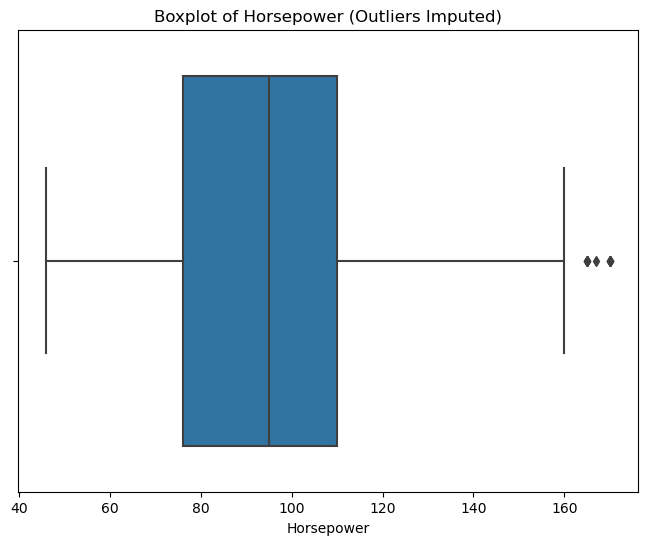

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='horsepower', data=df)
plt.title('Boxplot of Horsepower (Outliers Imputed)')
plt.xlabel('Horsepower')
plt.show()

## 5. Splitting dataset into features and target set

In [56]:
X=df.drop(columns=['mpg'])
y=df['mpg']

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## 6. Using and evaluating performance of different Regressive models on our dataset

### a. LinearRegression Model - Scikit-learn

In [60]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [61]:
prediction_linearReg = linear_regression_model.predict(X_test)
mse_linear = mean_squared_error(y_test, prediction_linearReg)
r2_linear = r2_score(y_test, prediction_linearReg)

In [62]:
print("Linear Regression Results:")
print(f"MSE of : {mse_linear}")
print(f"R-squared: {r2_linear}\n")


Linear Regression Results:
MSE of : 10.442621203594234
R-squared: 0.8078894353092225



### b. DecisionTreeRegressor Model - Scikit-learn

In [64]:
decision_tree_model = DecisionTreeRegressor()

In [65]:
decision_tree_model.fit(X_train, y_train)

y_pred_tree = decision_tree_model.predict(X_test)

In [66]:
mse_DecisionTree = mean_squared_error(y_test, y_pred_tree)
r2_DecisionTree = r2_score(y_test, y_pred_tree)
print("Decision Tree Results:")
print(f"MSE of : {mse_DecisionTree}")
print(f"R-squared: {r2_DecisionTree}\n")

Decision Tree Results:
MSE of : 18.508250000000004
R-squared: 0.6595078678412394



### c. Support Vector Regressor Model - Scikit-learn

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
svm_regressor = SVR(kernel='rbf')

In [70]:
svm_regressor.fit(X_train_scaled, y_train)

y_pred_svm = svm_regressor.predict(X_test_scaled)

In [71]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print("Support Vector Machines (SVM):")
print(f"MSE: {mse_svm}")
print(f"R-squared: {r2_svm}\n")

Support Vector Machines (SVM):
MSE: 12.675370178393045
R-squared: 0.7668140522230564



### d. RandomForestRegressor Model - Scikit-learn

In [73]:
random_forest = RandomForestRegressor()

In [74]:
random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)

In [75]:
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest:")
print(f"MSE: {mse_forest}")
print(f"R-squared: {r2_forest}\n")

Random Forest:
MSE: 6.626248212499997
R-squared: 0.878098394927273



### e. KNeighborsRegressor Model - Scikit-learn

In [77]:
knn_regressor = KNeighborsRegressor()

In [78]:
knn_regressor.fit(X_train, y_train)

y_pred_knn = knn_regressor.predict(X_test)

In [79]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN):")
print(f"MSE: {mse_knn}")
print(f"R-squared: {r2_knn}")

K-Nearest Neighbors (KNN):
MSE: 16.03181
R-squared: 0.7050663801675394


### f. XGBoost Regressor Model

In [81]:
xgb_model = XGBRegressor()

In [82]:
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [83]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Regressor:")
print(f"MSE: {mse_xgb}")
print(f"R-squared: {r2_xgb}\n")

XGBoost Regressor:
MSE: 7.999730934470946
R-squared: 0.8528307407467262



## 7. Choosing the best model according to parameters - in our case it is the RandomForestRegressor Model

In [85]:
final_model = random_forest

In [86]:
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

## 8. Loading our final model and doing predictions

In [88]:
our_final_model=joblib.load('final_model.pkl')

In [ ]:
print("Enter the vehicle parameters:")
cylinders = int(input("Number of cylinders: "))
displacement = float(input("Displacement (in cubic inches): "))
horsepower = float(input("Horsepower: "))
weight = float(input("Weight (in pounds): "))
acceleration = float(input("Acceleration (0-60 mph in seconds): "))
model_year = int(input("Model year (19XX format just write the last 2 digits of the year): "))
origin = int(input("Origin (1 for USA, 2 for Europe, 3 for Japan): "))

Enter the vehicle parameters:


Number of cylinders:  8
Displacement (in cubic inches):  1500
Horsepower:  400
Weight (in pounds):  2000
Acceleration (0-60 mph in seconds):  2.2
Model year (19XX format just write the last 2 digits of the year):  2015


In [ ]:
USA=0
Europe=0
Japan=0
if(origin==1):
  USA=1

elif(origin==2):
  Europe=1

else:
  Japan=1

In [ ]:
predicted_mpg = our_final_model.predict([[cylinders,displacement,horsepower,weight,acceleration,model_year,USA,Europe,Japan]])

In [ ]:
print(" Predicted MPG ="+str(predicted_mpg))